In [155]:
import sys
print(sys.version)

3.5.3 |Anaconda 4.4.0 (x86_64)| (default, Mar  6 2017, 12:15:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


In [156]:
# load dependencies
import pandas as pd
import io
import requests
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
# reference: 
# https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url

### Table of Content
1. [Goal of This Project](#section1)
2. [Golden Rule of Machine Learning](#section2)
3. [Exploratory Data Analysis (EDA)](#section3)
4. [Reflection of EDA](#section4)
5. [More Data Wrangling](#section5)

<a id="section1"></a>
### Goal of This Project

I plan to go to Las Vegas with my undergrad buddies in June 2018. To ensure that we have a good time there, my goal is to find the best predictors that differentiate hotel scores based on user reviews. I will use my findings to book a hotel for our trip.

Data Source: [UCI Machine Learning Repository: Las Vegas Strip Data Set](http://archive.ics.uci.edu/ml/datasets/Las+Vegas+Strip)

<a id="section2"></a>
### Follow the "Golden Rule of Machine Learning"

Retrieve the data set from the source and set a side some data instances as a test set. I will only inspect the training data set.

In [178]:
# load the data
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00397/LasVegasTripAdvisorReviews-Dataset.csv"
raw_dataframe = pd.read_csv(url, delimiter=';')
# reference:
# https://stackoverflow.com/questions/32400867/pandas-read-csv-from-url/41880513#41880513

# split raw data frame into two sets
training_dataframe = raw_dataframe[:336]
test_datafram = raw_dataframe[336:]

# view the first 2 rows of raw data frame
training_dataframe.head(2)

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday


<a id="section1"></a>
### Exploratory data analysis

I should learn more about the data set then start my feature selection with a deeper understanding of the data set.

In [179]:
training_dataframe.info()

# reference: 
# https://github.com/ubcs3/2017-Fall/blob/master/notes-2017-10-06/notes-2017-10-06.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 20 columns):
User country         336 non-null object
Nr. reviews          336 non-null int64
Nr. hotel reviews    336 non-null int64
Helpful votes        336 non-null int64
Score                336 non-null int64
Period of stay       336 non-null object
Traveler type        336 non-null object
Pool                 336 non-null object
Gym                  336 non-null object
Tennis court         336 non-null object
Spa                  336 non-null object
Casino               336 non-null object
Free internet        336 non-null object
Hotel name           336 non-null object
Hotel stars          336 non-null object
Nr. rooms            336 non-null int64
User continent       336 non-null object
Member years         336 non-null int64
Review month         336 non-null object
Review weekday       336 non-null object
dtypes: int64(6), object(14)
memory usage: 52.6+ KB


In [181]:
training_dataframe["Hotel name"].value_counts()

Trump International Hotel Las Vegas                    24
Monte Carlo Resort&Casino                              24
Marriott's Grand Chateau                               24
The Palazzo Resort Hotel Casino                        24
Excalibur Hotel & Casino                               24
Wynn Las Vegas                                         24
The Cosmopolitan Las Vegas                             24
The Cromwell                                           24
Circus Circus Hotel & Casino Las Vegas                 24
Hilton Grand Vacations on the Boulevard                24
Tropicana Las Vegas - A Double Tree by Hilton Hotel    24
Encore at wynn Las Vegas                               24
Treasure Island- TI Hotel & Casino                     24
Caesars Palace                                         24
Name: Hotel name, dtype: int64

> Hotels are evenly reviewed by customers.

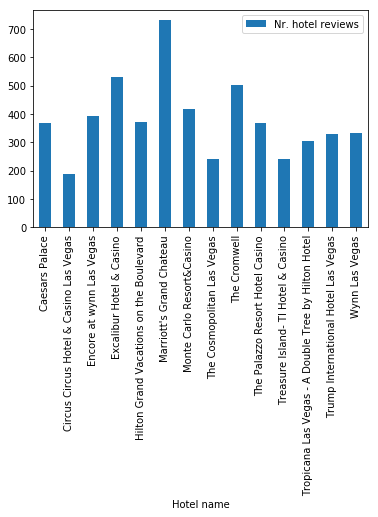

In [184]:
training_dataframe.groupby("Hotel name").sum().plot.bar(y="Nr. hotel reviews")

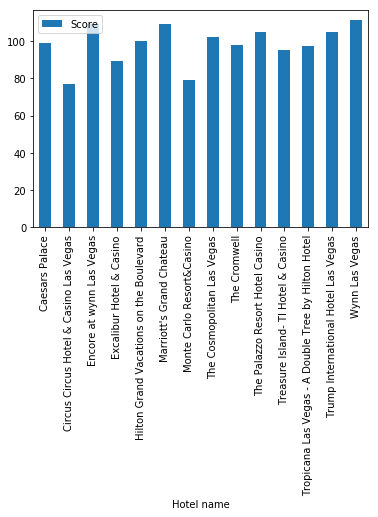

In [185]:
training_dataframe.groupby("Hotel name").sum().plot.bar(y="Score")

> Looking at the sum of hotel reviews, I realize that there is a big gap between the highest-rated hotel and the lowest. Looking at the sum of scores however, the gap is not very wide. Wynn Las Vegas seems to be the best rated hotel.

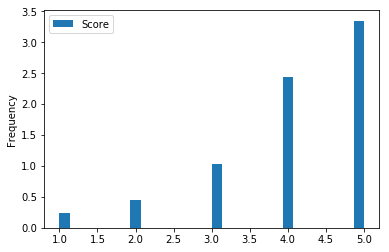

In [186]:
training_dataframe.plot.hist(y="Score", bins=30, normed=True)
plt.show()

> Most hotels seem to be in the 5.0 range.

> "Trump International Hotel Las Vegas" seems to have the highest sum of scores. Now I will look at the user countries.

In [190]:
training_dataframe["User country"].value_counts()

USA                     133
UK                       51
Canada                   44
Australia                25
Ireland                   9
Germany                   6
Mexico                    6
New Zeland                5
India                     5
Netherlands               4
Egypt                     3
Brazil                    3
Finland                   3
Thailand                  3
Singapore                 3
Norway                    3
Israel                    2
United Arab Emirates      2
Malaysia                  1
Honduras                  1
Spain                     1
Swiss                     1
Croatia                   1
Costa Rica                1
Puerto Rico               1
Kuwait                    1
Belgium                   1
Jordan                    1
Iran                      1
Phillippines              1
Hawaii                    1
France                    1
Hungary                   1
Kenya                     1
Greece                    1
Denmark             

> Most of the reviews are done by US customers. They may or may not reflect Canadian taste.

In [191]:
training_dataframe["Traveler type"].value_counts()

Couples     138
Families     73
Friends      59
Business     49
Solo         17
Name: Traveler type, dtype: int64

> Most of the reviews are done by couples. My group is not in this category. We are in the "friends" category.

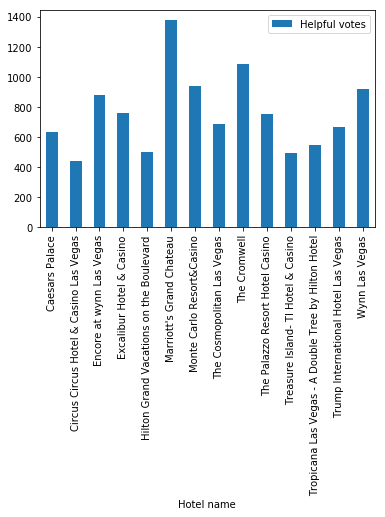

In [192]:
training_dataframe.groupby("Hotel name").sum().plot.bar(y="Helpful votes")
plt.show()

> Reviews of "Marriott's Grand Chateau" received the most helpful votes.

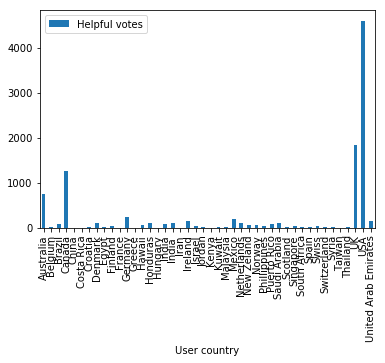

In [193]:
training_dataframe.groupby("User country").sum().plot.bar(y="Helpful votes")
plt.show()

> Reviews submitted by US, UK, Canadian, and Australian customers received the most helpful votes.

<a id="section4"></a>
#### Reflection after EDA
- Most of the reviews collected in this data set are from US customers and most reviewers are couples. Insight from this data set may not apply to my friends. 
- Most hotels are in the 5.0 and 4.0 range. I think that is reassuring. Most customers give good scores. 
- Is "Wynn Las Vegas" really the best?

<a id="section5"></a>
#### More Data Wrangling Needed

I realize that most features in this data set are categorical. I need to convert them into dummy variables so I can build a better model.

In [175]:
#redo data wrangling with dummies
raw_dataframe = pd.get_dummies(raw_dataframe)

raw_dataframe.head(2)

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Nr. rooms,Member years,User country_Australia,User country_Belgium,User country_Brazil,User country_Canada,...,Review month_November,Review month_October,Review month_September,Review weekday_Friday,Review weekday_Monday,Review weekday_Saturday,Review weekday_Sunday,Review weekday_Thursday,Review weekday_Tuesday,Review weekday_Wednesday
0,11,4,13,5,3773,9,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,119,21,75,3,3773,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [176]:
# convert data frame to numpy array
raw_data = raw_dataframe.values

# shuffle the array (in case it is sorted)
np.random.seed(123)
np.random.shuffle(raw_data)

# split into 2 sets
training_set = raw_data[:336]
test_set = raw_data[336:]

# take out the "score" label
# reference:
# https://stackoverflow.com/questions/8386675/extracting-specific-columns-in-numpy-array
training_label = training_set[:, [43]].flatten()
test_label = test_set[:, [3]].flatten()

X = np.delete(training_set, 3, 1)
Xtest = np.delete(test_set, 3, 1)